# Analysis of survey 2565 (Beer survey)

In [1]:
import matplotlib
import pandas as pd

pd.options.display.max_columns = 50

%matplotlib inline

In [2]:
ideas = pd.read_csv('wikisurvey_4446_ideas_2016-12-20T14-24-48Z.csv')
votes = pd.read_csv('wikisurvey_4446_votes_2016-12-20T14-24-51Z.csv')

In [3]:
ideas.head(1)

,Wikisurvey ID,Idea ID,Idea Text,Wins,Losses,Times involved in Cant Decide,Score,User Submitted,Session ID,Created at,Last Activity,Active,Appearances on Left,Appearances on Right,Info
0,4446,302537,Old Fashioned,28,12,6,69.0476,False,2976495,2014-01-26 21:31:17 UTC,2014-02-15 18:34:06 UTC,True,24,26,NaN


In [4]:
len(ideas)

21

In [5]:
len(votes)

340

In [6]:
votes.head(1)

,Vote ID,Session ID,Wikisurvey ID,Winner ID,Winner Text,Loser ID,Loser Text,Prompt ID,Appearance ID,Left Choice ID,Right Choice ID,Created at,Updated at,Response Time (s),Missing Response Time Explanation,Valid,Hashed IP Address,URL Alias,User Agent,Referrer,Widget,Info
0,5808522,2976495,4446,302541,White Russian,302525,Manhattan,16062529,9708971,302525,302541,2014-01-26 21:31:24 UTC,2014-01-26 21:31:24 UTC,4.262,NaN,True,eea76a93a91feaed66e55cae0db062f6,cocktailparty,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,http://www.allourideas.org/questions/new,False,NaN


In [7]:
len(votes['Session ID'].unique())

15

In [8]:
len(votes['Hashed IP Address'].unique())

14

In [9]:
len(votes['Winner ID'].unique())

21

In [10]:
len(votes['Loser ID'].unique())

21

In [11]:
votes.groupby('Hashed IP Address').count()['Vote ID']

Hashed IP Address
08406b2274867a1d7e9cfb5b2eae4e2e    21
0862499c2755b5eab5ff6450f5a1c617    14
0b399f4647cc6033c52253c7b0c30d0e    23
10ca03a8397ae98064d8ec46c17db225    38
2fee1a141bb26bdea34a826aafa9e650    20
3353d55a036a4b492651b72ecf773aa8     1
412bcd2e5797ff8eab86a1e22d7413a6    16
5c7f193a6a9d6daf5ca813997b9857c6    40
6e457e148554b344d0f1c0a27c924954    28
8c42c4a80d575312b4c8a36d1089297e    20
9ce518e0e75c5ba57c718b3c0959b401    59
a8a8b75428d1aaa44a5a872385f96e25    37
d7547d9f6289ea169c4d0fa3a800ec19    13
eea76a93a91feaed66e55cae0db062f6    10
Name: Vote ID, dtype: int64

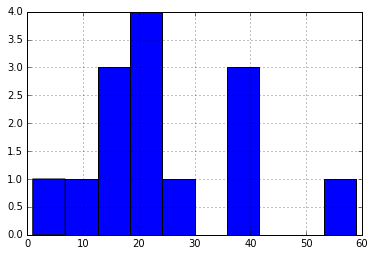

In [16]:
votes.groupby('Hashed IP Address').count()['Vote ID'].hist()

In [12]:
votes.groupby('Session ID').count()['Vote ID']

Session ID
2976495    10
2993310    26
2993347    14
2993373    59
2993417    37
2993438    28
2993607    20
2996442    38
2997537    14
3017883    16
3020486    20
3043415    23
3065022     1
3067669    21
3070905    13
Name: Vote ID, dtype: int64

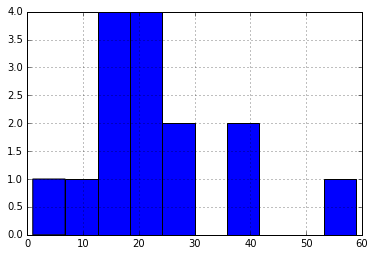

In [17]:
votes.groupby('Session ID').count()['Vote ID'].hist()

In [18]:
data = votes[['Winner ID', 'Loser ID', 'Hashed IP Address']].copy()
data.head()

,Winner ID,Loser ID,Hashed IP Address
0,302541,302525,eea76a93a91feaed66e55cae0db062f6
1,302530,302538,eea76a93a91feaed66e55cae0db062f6
2,302535,302529,eea76a93a91feaed66e55cae0db062f6
3,302535,302536,eea76a93a91feaed66e55cae0db062f6
4,302537,302541,eea76a93a91feaed66e55cae0db062f6


In [19]:
data['value'] = (data['Winner ID'] > data['Loser ID']).apply(int)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value
0,302541,302525,eea76a93a91feaed66e55cae0db062f6,1
1,302530,302538,eea76a93a91feaed66e55cae0db062f6,0
2,302535,302529,eea76a93a91feaed66e55cae0db062f6,1
3,302535,302536,eea76a93a91feaed66e55cae0db062f6,0
4,302537,302541,eea76a93a91feaed66e55cae0db062f6,0


In [20]:
data['bigIndex'] = data[['Winner ID', 'Loser ID']].apply(max, axis=1)
data['smallIndex'] = data[['Winner ID', 'Loser ID']].apply(min, axis=1)
data.head()

,Winner ID,Loser ID,Hashed IP Address,value,bigIndex,smallIndex
0,302541,302525,eea76a93a91feaed66e55cae0db062f6,1,302541,302525
1,302530,302538,eea76a93a91feaed66e55cae0db062f6,0,302538,302530
2,302535,302529,eea76a93a91feaed66e55cae0db062f6,1,302535,302529
3,302535,302536,eea76a93a91feaed66e55cae0db062f6,0,302536,302535
4,302537,302541,eea76a93a91feaed66e55cae0db062f6,0,302541,302537


In [21]:
data['userId'] = data['Hashed IP Address']

In [ ]:
item_map = {}
for i, item_id in enumerate(ideas['Idea ID'].sort_values()): 
    item_map[item_id] = i
    
text_map = {}
id_to_text = ideas.set_index('Idea ID')['Idea Text']
for i, item_id in enumerate(ideas['Idea ID']):
    text_map[i] = id_to_text[item_id]

In [ ]:
pd.DataFrame.from_dict(item_map, orient='index').to_csv('item_map.csv', header=False)

In [ ]:
pd.DataFrame.from_dict(text_map, orient='index').to_csv('text_map.csv', header=False)

In [ ]:
for item in item_map:
    data.loc[data['smallIndex'] == item, 'smallIndex'] = item_map[item]
    data.loc[data['bigIndex'] == item, 'bigIndex'] = item_map[item]

In [ ]:
data.head()

In [ ]:
data[['smallIndex', 'bigIndex', 'value', 'userId']].to_csv('dat.csv', index=False, header=False)
pd.read_csv('dat.csv', header=None)